In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

members_df = pd.read_csv('data/members.csv',)
expeditions_df = pd.read_csv('data/expeditions.csv')
peaks_df = pd.read_csv('data/peaks.csv')

# Project 2 Presentation
## An Exploration of Mountain Climbing Over The Last Century
##### Team Members: Alec Heyde, Josh Pearce, Ender Ricart, Vai Vasudeva
Data Set: Tidy Tuesday Himalayan Climbing Expeditions (https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-09-22/readme.md) 

Objective 1: Factors associated with expedition success* or failure

Objective 2: Observe historical changes in mountain climbing

Success is being defined as follows: 
* Reached a peak yes or no (expeditions dataset)
* No one died (expeditions dataset)

We started with three data-sets: Peaks, Expeditions, Members

In [4]:
print("Peaks Data")
peaks_df.head()

Peaks Data


,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,"1,961.00","New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,"1,953.00",UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,"1,950.00",France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,"1,960.00","UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,"1,961.00",India,ANN361101


In [5]:
print("Expedition Data")
expeditions_df.head()

Expedition Data


,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),"7,937.00",10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),"7,937.00",10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),"7,937.00",6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)","7,000.00",2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)","7,160.00",3,0,0,0,False,NaN


In [6]:
print("Expedition Member Data")
members_df.head()

Expedition Member Data


,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.00,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.00,France,Deputy Leader,...,"6,000.00",False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.00,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.00,France,Exp Doctor,...,"6,000.00",False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.00,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


#### Let's dive into each data-set before looking across them

Peaks

In [7]:
peaks2 = peaks_df.copy()

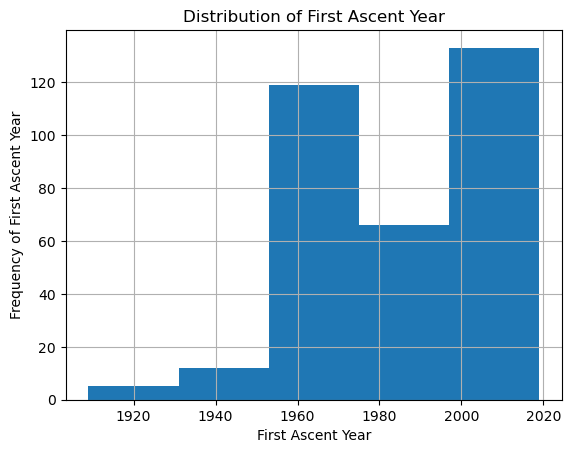

In [8]:
#filter first ascent column
peaks2['first_ascent_year'].loc[peaks2['first_ascent_year']>1800].hist(bins=5)

# label x-axis
plt.xlabel('First Ascent Year')

# label y-axis
plt.ylabel('Frequency of First Ascent Year')

# title plot
plt.title('Distribution of First Ascent Year')

# display figure
plt.show() 

In [10]:
print(peaks2['peak_name'].values)


['Ama Dablam' 'Amphu Gyabjen' 'Annapurna I' 'Annapurna II' 'Annapurna III'
 'Annapurna IV' 'Annapurna I East' 'Annapurna I Middle' 'Annapurna South'
 'Api Main' 'Api West' 'Baruntse' 'Baudha' 'Bhemdang Ri' 'Bhrikuti'
 'Bobaye' 'Chamlang' 'Changla' 'Chamar North' 'Cheo Himal' 'Cho Oyu'
 'Chobuje' 'Cholatse' 'Cho Polu' 'Chulu Central' 'Chukyima Go'
 'Churen Himal Central' 'Chulu West' 'Taple Shikhar' 'Changtse'
 'Dhaulagiri I' 'Dhaulagiri II' 'Dhaulagiri III' 'Dhaulagiri IV'
 'Dhaulagiri V' 'Dhaulagiri VI' 'Dhampus' 'Dogari' 'Pemthang Karpo Ri'
 'Dorje Lhakpa' 'Drangnag Ri' 'Drohmo' 'Everest' 'Fang' 'Firnkopf'
 'Firnkopf West' 'Gama Peak' 'Ganesh I' 'Ganesh III' 'Ganesh II'
 'Ganesh IV' 'Ganesh V' 'Ganesh VI' 'Ganchenpo' 'Gandharva Chuli'
 'Gangapurna' 'Gaurishankar' 'Ghustang North' 'Ghustang South'
 'Matathumba' 'Ghyuthumba Main' 'Gimmigela Chuli East' 'Gimmigela Chuli'
 'Glacier Dome' 'Gurja Himal' 'Gurkarpo Ri' 'Gyachung Kang' 'Gyajikang'
 'Leonpo Gang East' 'Himalchuli East' 'Himlun

In [ ]:
nepal_peaks_list = [
    # Everest Region
    'Ama Dablam', 'Amphu Gyabjen', 'Baruntse', 'Cholatse', 'Cho Oyu',
    'Everest', 'Kangtega', 'Lhotse', 'Lobuje East', 'Lobuje West',
    'Nuptse', 'Pumori', 'Tawoche',

    # Annapurna Region
    'Annapurna I', 'Annapurna II', 'Annapurna III', 'Annapurna IV',
    'Annapurna South', 'Gangapurna', 'Hiunchuli', 'Machhapuchhare',
    'Tilicho',

    # Langtang Region
    'Dorje Lhakpa', 'Ganesh I', 'Ganesh II', 'Ganesh III', 'Ganesh IV', 
    'Ganesh V', 'Ganesh VI', 'Gaurishankar', 'Langtang Lirung', 
    'Naya Kanga', 'Yubra',

    # Manaslu Region
    'Manaslu', 'Himalchuli East', 'Himalchuli North', 'Himalchuli West',
    'Ngadi Chuli',

    # Dhaulagiri Region
    'Dhaulagiri I', 'Dhaulagiri II', 'Dhaulagiri III', 'Dhaulagiri IV',
    'Dhaulagiri V', 'Dhaulagiri VI', 'Churen Himal East', 
    'Churen Himal Central', 'Churen Himal West', 'Gurja Himal', 
    'Putha Hiunchuli',

    # Kangchenjunga Region
    'Kangchenjunga', 'Kangchenjunga Central', 'Kangchenjunga South',
    'Kangchenjunga West', 'Yalung Kang', 'Jannu',

    # Popular Trekking Peaks
    'Mera Peak', 'Island Peak', 'Pisang Peak', 'Saribung', 
    'Pharchamo', 'Dhampus Peak'
]

# Filter peaks in Nepal with 'Nepal' in the first_ascent_country column
nepal_filtered_df = peaks2[
    (peaks2['peak_name'].isin(nepal_peaks_list))
]

# Print the first few rows of the filtered DataFrame
print(nepal_filtered_df)


    peak_id              peak_name                 peak_alternative_name  \
0      AMAD             Ama Dablam                          Amai Dablang   
1      AMPG          Amphu Gyabjen                                   NaN   
2      ANN1            Annapurna I                                   NaN   
3      ANN2           Annapurna II                                   NaN   
4      ANN3          Annapurna III                                   NaN   
5      ANN4           Annapurna IV                                   NaN   
8      ANNS        Annapurna South            Annapurna Dakshin, Moditse   
11     BARU               Baruntse                                   NaN   
20     CHOY                Cho Oyu                                   NaN   
22     CHOL               Cholatse              Tsolatse, Jobo Lhaptshan   
26     CHUR   Churen Himal Central                                   NaN   
30     DHA1           Dhaulagiri I                                   NaN   
31     DHA2 